### Build Timeseries

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

C:\Users\Roy\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Roy\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Roy\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/Indonesia.csv')
data.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,Indonesia,2021-01-12,Sinovac,https://www.dw.com/en/indonesias-covid-vaccina...,0,0,0
1,Indonesia,2021-01-22,Sinovac,https://sehatnegeriku.kemkes.go.id/baca/rilis-...,132000,132000,0
2,Indonesia,2021-01-24,Sinovac,https://www.kemkes.go.id/,149242,149242,0
3,Indonesia,2021-01-25,Sinovac,https://www.kemkes.go.id/,161959,161959,0
4,Indonesia,2021-01-26,Sinovac,https://www.kemkes.go.id/,245685,245685,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   location                 104 non-null    object
 1   date                     104 non-null    object
 2   vaccine                  104 non-null    object
 3   source_url               104 non-null    object
 4   total_vaccinations       104 non-null    int64 
 5   people_vaccinated        104 non-null    int64 
 6   people_fully_vaccinated  104 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.8+ KB


In [4]:
data.drop(columns=['source_url'], inplace=True)
data.head()

,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,Indonesia,2021-01-12,Sinovac,0,0,0
1,Indonesia,2021-01-22,Sinovac,132000,132000,0
2,Indonesia,2021-01-24,Sinovac,149242,149242,0
3,Indonesia,2021-01-25,Sinovac,161959,161959,0
4,Indonesia,2021-01-26,Sinovac,245685,245685,0


In [5]:
data['date'] = pd.to_datetime(data['date'])
data

,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,Indonesia,2021-01-12,Sinovac,0,0,0
1,Indonesia,2021-01-22,Sinovac,132000,132000,0
2,Indonesia,2021-01-24,Sinovac,149242,149242,0
3,Indonesia,2021-01-25,Sinovac,161959,161959,0
4,Indonesia,2021-01-26,Sinovac,245685,245685,0
...,...,...,...,...,...,...
99,Indonesia,2021-06-03,"Oxford/AstraZeneca, Sinovac",28027750,17042850,10984900
100,Indonesia,2021-06-04,"Oxford/AstraZeneca, Sinovac",28486710,17416321,11070389
101,Indonesia,2021-06-05,"Oxford/AstraZeneca, Sinovac",28702933,17581464,11121469
102,Indonesia,2021-06-06,"Oxford/AstraZeneca, Sinovac",28770360,17643603,11126757


In [6]:
data.set_index('date', inplace=True)
data

,location,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated
date,,,,,
2021-01-12,Indonesia,Sinovac,0,0,0
2021-01-22,Indonesia,Sinovac,132000,132000,0
2021-01-24,Indonesia,Sinovac,149242,149242,0
2021-01-25,Indonesia,Sinovac,161959,161959,0
2021-01-26,Indonesia,Sinovac,245685,245685,0
...,...,...,...,...,...
2021-06-03,Indonesia,"Oxford/AstraZeneca, Sinovac",28027750,17042850,10984900
2021-06-04,Indonesia,"Oxford/AstraZeneca, Sinovac",28486710,17416321,11070389
2021-06-05,Indonesia,"Oxford/AstraZeneca, Sinovac",28702933,17581464,11121469


In [7]:
data.total_vaccinations[-1]

28972987

In [8]:
latest_date = data.index[-1]
print(latest_date)

2021-06-07 00:00:00


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 2021-01-12 to 2021-06-07
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   location                 104 non-null    object
 1   vaccine                  104 non-null    object
 2   total_vaccinations       104 non-null    int64 
 3   people_vaccinated        104 non-null    int64 
 4   people_fully_vaccinated  104 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.9+ KB


In [10]:
d = dict.fromkeys(data.select_dtypes(np.int64).columns, np.float32)
data = data.astype(d)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 2021-01-12 to 2021-06-07
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 104 non-null    object 
 1   vaccine                  104 non-null    object 
 2   total_vaccinations       104 non-null    float32
 3   people_vaccinated        104 non-null    float32
 4   people_fully_vaccinated  104 non-null    float32
dtypes: float32(3), object(2)
memory usage: 3.7+ KB


### Visualization

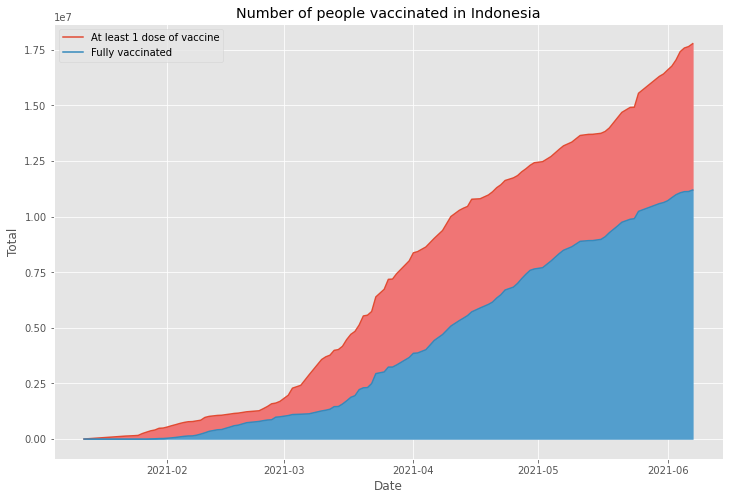

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
plt.title('Number of people vaccinated in Indonesia')
# plt.yticks(ticks=[0, 15000000, 30000000])
plt.plot(data.index, data.people_vaccinated, label='At least 1 dose of vaccine')
plt.plot(data.index, data.people_fully_vaccinated, label="Fully vaccinated")
plt.fill_between(data.index, data.people_vaccinated, data.people_fully_vaccinated, color='#f07575')
plt.fill_between(data.index, data.people_fully_vaccinated, color='#539ecd')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()


## Modeling Time Series

In [13]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [14]:
vacc_one = data.people_vaccinated.to_numpy()
vacc_full = data.people_fully_vaccinated.to_numpy()
timesteps = data.index.to_numpy()

In [15]:
split_date = 70
time_train = data.index[:split_date]
time_valid = data.index[split_date:]
X1_train = data.people_vaccinated[:split_date]
X2_train = data.people_fully_vaccinated[:split_date]

X1_valid = data.people_vaccinated[split_date:]
X2_valid = data.people_fully_vaccinated[split_date:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

HORIZON = 1 # predict next day
WINDOW_SIZE = 3 # use worth of data

## Function

In [16]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [17]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [18]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [19]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [20]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [21]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [22]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [23]:

def get_future_dates(start_date, horizon=1, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  horizon: number of day to add onto start date for range (int)
  offset: if offset=1 (default), original date is not included, if offset=0, original date is included
  """
  return np.arange(start_date + np.timedelta64(offset, "D"), start_date + np.timedelta64(horizon+1, "D"), dtype="datetime64[D]")

In [24]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Datetime")
  plt.ylabel("Number Vaccinated")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

## Start Modeling

In [25]:
# Create windowed dataset
full_windows, full_labels = make_windows(vacc_one, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(101, 101)

In [26]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(80, 21, 80, 21)

In [27]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  # resize the inputs to adjust for window size / Conv1D 3D input requirements
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), 
  tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  tf.keras.layers.Dense(HORIZON)
], name="model_conv1D")


model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

In [28]:
history_1 = model.fit(
                train_windows,
                train_labels,
                batch_size=128, 
                epochs=100,
                verbose=0,
                validation_data=(test_windows, test_labels),
                callbacks=[create_model_checkpoint(model_name=model.name)])

INFO:tensorflow:Assets written to: model_experiments\model_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_conv1D\assets
INFO:tensorflow:Assets written to: model_experiment

In [29]:
# Load in best performing Conv1D model and evaluate it on the test data
new_model = tf.keras.models.load_model("model_experiments/model_conv1D")
new_model.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 256ms/step - loss: 193763.7656 - mae: 193763.7656


[193763.765625, 193763.765625]

In [30]:
# Make predictions
new_model_preds = make_preds(new_model, test_windows)
new_model_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13348104., 13568048., 13783550., 13957258., 14071952., 14105436.,
       14151937., 14252246., 14503313., 14797420.], dtype=float32)>

In [31]:
# Evaluate predictions
new_model_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=new_model_preds)
new_model_results

{'mae': 193763.77,
 'mse': 62542336000.0,
 'rmse': 250084.66,
 'mape': 1.261859,
 'mase': 0.8754817}

In [32]:
# Make predictions on the future

# List for new preds
future_forecast = []
last_window = vacc_one[-WINDOW_SIZE:] # get the last window of the training data
into_future = 20 # how far to predict into the future

for i in range(into_future):
  # Make a pred for the last window, then append the prediction, append it again, append it again
  pred = new_model.predict(tf.expand_dims(last_window, axis=0))
  print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(pred).numpy()}\n")
  future_forecast.append(tf.squeeze(pred).numpy())
  # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
  last_window = np.append(last_window, pred)[-WINDOW_SIZE:]

Predicting on: 
 [17581464. 17643604. 17775918.] -> Prediction: 18173688.0

Predicting on: 
 [17643604. 17775918. 18173688.] -> Prediction: 18384076.0

Predicting on: 
 [17775918. 18173688. 18384076.] -> Prediction: 18638476.0

Predicting on: 
 [18173688. 18384076. 18638476.] -> Prediction: 18931760.0

Predicting on: 
 [18384076. 18638476. 18931760.] -> Prediction: 19193332.0

Predicting on: 
 [18638476. 18931760. 19193332.] -> Prediction: 19470742.0

Predicting on: 
 [18931760. 19193332. 19470742.] -> Prediction: 19755838.0

Predicting on: 
 [19193332. 19470742. 19755838.] -> Prediction: 20038810.0

Predicting on: 
 [19470742. 19755838. 20038810.] -> Prediction: 20328744.0

Predicting on: 
 [19755838. 20038810. 20328744.] -> Prediction: 20623000.0

Predicting on: 
 [20038810. 20328744. 20623000.] -> Prediction: 20920502.0

Predicting on: 
 [20328744. 20623000. 20920502.] -> Prediction: 21222916.0

Predicting on: 
 [20623000. 20920502. 21222916.] -> Prediction: 21529620.0

Predicting o

In [33]:
future_forecast[:10]

[18173688.0,
 18384076.0,
 18638476.0,
 18931760.0,
 19193332.0,
 19470742.0,
 19755838.0,
 20038810.0,
 20328744.0,
 20623000.0]

In [34]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = data.index[-1]
last_timestep

Timestamp('2021-06-07 00:00:00')

In [35]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, horizon=into_future)
next_time_steps

array(['2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
       '2021-06-12', '2021-06-13', '2021-06-14', '2021-06-15',
       '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-19',
       '2021-06-20', '2021-06-21'], dtype='datetime64[D]')

In [36]:

# Add in extra timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, data.people_vaccinated[-1])
next_time_steps, future_forecast

(array(['2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
        '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14',
        '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18',
        '2021-06-19', '2021-06-20', '2021-06-21'], dtype='datetime64[D]'),
 array([17775918., 18173688., 18384076., 18638476., 18931760., 19193332.,
        19470742., 19755838., 20038810., 20328744., 20623000., 20920502.,
        21222916., 21529620., 21840612.], dtype=float32))

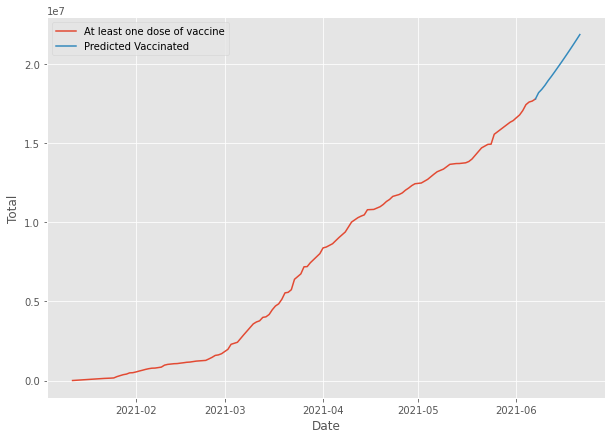

In [37]:
# TODO: if we predict far enough into the future we start to see what happens to our model's forecasts... (they begin to break down)
plt.figure(figsize=(10, 7))

plt.plot(data.index, data.people_vaccinated, label="At least one dose of vaccine")
plt.plot(next_time_steps[:15], future_forecast, label="Predicted Vaccinated")
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()

## Fully Vaccinated

In [38]:
# Create windowed dataset
full_windows, full_labels = make_windows(vacc_full, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(101, 101)

In [39]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(80, 21, 80, 21)

In [40]:
history_2 = model.fit(
                train_windows,
                train_labels,
                batch_size=128, 
                epochs=100,
                verbose=0,
                validation_data=(test_windows, test_labels),
                callbacks=[create_model_checkpoint(model_name=model.name + 'full')])

INFO:tensorflow:Assets written to: model_experiments\model_conv1Dfull\assets


In [41]:
# Load in best performing Conv1D model and evaluate it on the test data
new_model = tf.keras.models.load_model("model_experiments/model_conv1Dfull")
new_model.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 216ms/step - loss: 141920.7188 - mae: 141920.7188


[141920.71875, 141920.71875]

In [42]:
# Make predictions
new_model_preds = make_preds(new_model, test_windows)
new_model_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8568060., 8785469., 8977345., 9123172., 9213770., 9244631.,
       9307373., 9432482., 9645407., 9869294.], dtype=float32)>

In [43]:
# Evaluate predictions
new_model_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=new_model_preds)
new_model_results

{'mae': 141920.72,
 'mse': 27007177000.0,
 'rmse': 164338.61,
 'mape': 1.4021724,
 'mase': 1.1116916}

In [44]:
# Make predictions on the future

# List for new preds
future_forecast = []
last_window = vacc_full[-WINDOW_SIZE:] # get the last window of the training data
into_future = 14 # how far to predict into the future

for i in range(into_future):
  # Make a pred for the last window, then append the prediction, append it again, append it again
  pred = new_model.predict(tf.expand_dims(last_window, axis=0))
  print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(pred).numpy()}\n")
  future_forecast.append(tf.squeeze(pred).numpy())
  # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
  last_window = np.append(last_window, pred)[-WINDOW_SIZE:]

Predicting on: 
 [11121469. 11126757. 11197069.] -> Prediction: 11529370.0

Predicting on: 
 [11126757. 11197069. 11529370.] -> Prediction: 11678158.0

Predicting on: 
 [11197069. 11529370. 11678158.] -> Prediction: 11868956.0

Predicting on: 
 [11529370. 11678158. 11868956.] -> Prediction: 12097752.0

Predicting on: 
 [11678158. 11868956. 12097752.] -> Prediction: 12295531.0

Predicting on: 
 [11868956. 12097752. 12295531.] -> Prediction: 12508312.0

Predicting on: 
 [12097752. 12295531. 12508312.] -> Prediction: 12728412.0

Predicting on: 
 [12295531. 12508312. 12728412.] -> Prediction: 12946285.0

Predicting on: 
 [12508312. 12728412. 12946285.] -> Prediction: 13170674.0

Predicting on: 
 [12728412. 12946285. 13170674.] -> Prediction: 13399090.0

Predicting on: 
 [12946285. 13170674. 13399090.] -> Prediction: 13630492.0

Predicting on: 
 [13170674. 13399090. 13630492.] -> Prediction: 13866476.0

Predicting on: 
 [13399090. 13630492. 13866476.] -> Prediction: 14106477.0

Predicting o

In [45]:
future_forecast[:10]

[11529370.0,
 11678158.0,
 11868956.0,
 12097752.0,
 12295531.0,
 12508312.0,
 12728412.0,
 12946285.0,
 13170674.0,
 13399090.0]

In [46]:
# Add in extra timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)

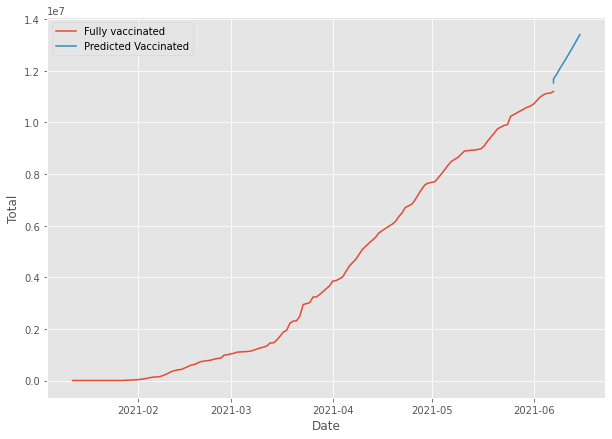

In [47]:
# TODO: if we predict far enough into the future we start to see what happens to our model's forecasts... (they begin to break down)
plt.figure(figsize=(10, 7))

plt.plot(data.index, data.people_fully_vaccinated, label="Fully vaccinated")
plt.plot(next_time_steps[:10], future_forecast[:10], label="Predicted Vaccinated")
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()